<a href="https://colab.research.google.com/github/bevel-bee/Economic-dispatch-optimization/blob/main/Economic_dispatch_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🟢 import library **(🟢 is actual script to run)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyomo.environ import *         # * means import everything
import numpy as np

⚡ Samples Choosing Models with Variable, Instant, Constraints, and Objective    **(⚡ is just a sample, not for the actual script)**

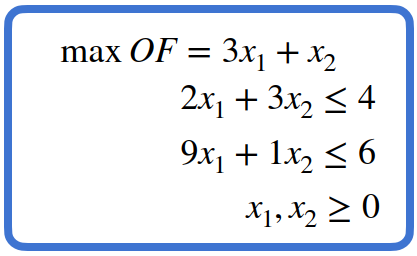

In [ ]:
''' 
model = ConcreteModel()       # or model = AbstractModel()
model.x = pyo.Var([1,2], domain = pyo.NonNegativeReals)       # 📗 From Lecture
(or)_______________________________________
model.x1 = Var(bounds = (0,4), within = NonNegativeReals )      # 📙 From another example
model.x2 = Var(bounds = (0,4), within = NonNegativeReals ) 
model.a11 =Param(mutable=True)        # if iterations are necessary
model.R=Param(initialize=1)       # R in case of limiting values for RHS  # All given data are to be put as 'initialize'


model.Constraint_1 = pyo.Constraint(expr = 10*model.x[1] + 20*model.x[2] <= 6000)       # 📗 From Lecture
model.Constraint_2 = pyo.Constraint(expr = 5*model.x[1] + 4*model.x[2] <= 2000)
model.Constraint_3 = pyo.Constraint(expr = 1*model.x[1] + 4*model.x[2] <= 1000)
model.Constraint_4 = pyo.Constraint(expr = 1*model.x[1] + 8*model.x[2] <= 1840)
(or)_______________________________________
model.eq1 = Constraint(expr = model.a11*model.x1 + 3*model.x2<=4)       # 📙 From another example
model.eq2 = Constraint(expr = 9*model.x1 + 1*model.x2<=6)


model.obj = pyo.Objective(expr = 10*model.x[1] + 12*model.x[2], sense = pyo.maximize)       # 📗 From Lecture
(or)_______________________________________
model.obj = Objective(expr = 3*model.x1 + model.x2, sense=maximize)       # 📙 From another example
'''

⚡Assign 'glpk' and 'feasible' check  **(feasible check is not necessary always)**


In [ ]:
'''
model3 = pyo.ConcreteModel()  # As usual

model3.x = pyo.Var([1,2], domain = pyo.Reals)   # As usual

def rule_1(mo):     # 📗 From Lecture_Constraints
    return mo.x[1] + 4*mo.x[2] >= 10    # Coonstraint 1
model3.constr_1 = pyo.Constraint(rule=rule_1)

def rule_5(m):      #   Objective     # 📗 From Lecture_Objective
    return -7*m.x[1] + 2* m.x[2]
model3.objective = pyo.Objective(rule=rule_5, sense = pyo.minimize)

opt = pyo.SolverFactory('glpk').solve(model3)     # 📗 From Lecture_Solve
for v in model3.component_data_objects([pyo.Var, pyo.Objective]):
    print(v, '=', pyo.value(v))
(or)_______________________________________
opt = SolverFactory('glpk')       # 📙 From another example
instance = model.create_instance()

instance.a11=1
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)
'''

⚡Show Results and test try y and obj values **if x=1 **

In [ ]:
'''
opt = pyo.SolverFactory('glpk')
opt.solve(model)

print('x= ',round(value(model.x),3))
print('y= ',round(value(model.y),3))
print('OF= ',round(value(model.f1),3) )
_______________________________________
model.x.fix(1)
results=solver.solve(model);
'''

"\nprint('x= ',round(value(model.x),3))\nprint('y= ',round(value(model.y),3))\nprint('OF= ',round(value(model.f1),3) )\n_______________________________________\nmodel.x.fix(1)\nresults=solver.solve(model);\n"

## 🟢Create DataFrames from 'inputs' folder


In [ ]:
powerplants = pd.read_csv('inputs/2020_majorPowerplants_GER_1h.csv', index_col=0)
emission_factors = pd.read_csv('inputs/2020_emissionFactors_GER_1h.csv', index_col=0)
demand_df = pd.read_csv('inputs/2020_demand_GER_1h.csv', index_col=0, parse_dates=True)
feed_in_df = pd.read_csv('inputs/2020_renewablesCF_GER_1h.csv', index_col=0, parse_dates=True)
fuel_prices = pd.read_csv('inputs/2020_fuelPrices_GER_1h.csv', index_col=0, parse_dates=True)

## 🟢Setting Colors

In [ ]:
colors = {'nuclear': 'green',
          'lignite': 'brown',
          'hard coal': 'black',
          'natural gas': 'red',
          'oil': 'yellow'
          }